# 准备工作

In [313]:
import pandas as pd

In [314]:
file = "~/Data/watermelon_classify_data.csv"  #这里要改为你自己电脑上存储的文件路径
data = pd.read_csv(file,header=None)
data.columns = ["id","density","sugar","label"]   #添加列名

In [315]:
#预览数据
data[:5]

,id,density,sugar,label
0,1,0.697,0.460,是
1,2,0.774,0.376,是
2,3,0.634,0.264,是
3,4,0.608,0.318,是
4,5,0.556,0.215,是


# 开始编码

## 第一步，数据预处理

本数据集中，
第一列是编号列，不是啥有用的特征，可直接舍弃。

#### 最后一列是标签列，但是类型值，对机器来说不友好，需要转化成0,1这样的数值型

In [316]:
data["newlabel"] = data["label"].map({"是":1,"否":0})
#再看一下数据
data[:10]

,id,density,sugar,label,newlabel
0,1,0.697,0.460,是,1
1,2,0.774,0.376,是,1
2,3,0.634,0.264,是,1
3,4,0.608,0.318,是,1
4,5,0.556,0.215,是,1
5,6,0.403,0.237,是,1
6,7,0.481,0.149,是,1
7,8,0.437,0.211,是,1
8,9,0.666,0.091,否,0
9,10,0.243,0.267,否,0


因为本题只有两个特征变量，所以可以在平面图上画一下数据分布，直观感受下样本的分布

In [317]:
import seaborn as sns

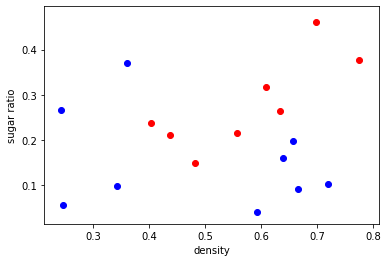

In [318]:
import matplotlib.pyplot as plt
plt.scatter(data["density"][:8],data["sugar"][:8],color="red")
plt.scatter(data["density"][8:],data["sugar"][8:],color="blue")
plt.xlabel("density")
plt.ylabel("sugar ratio")
plt.show()

#### 本案例进行的是有监督的学习，我们需要先把数据集拆成特征集、标签

In [319]:
X = data[["density","sugar"]]
y = data["newlabel"]

In [320]:
X[:3]

,density,sugar
0,0.697,0.460
1,0.774,0.376
2,0.634,0.264


In [321]:
y[:3]

0    1
1    1
2    1
Name: newlabel, dtype: int64

#### 拆分训练集与测试集

In [322]:
from sklearn.model_selection import train_test_split
#X_train,y_train分别是训练集的特征集、标签向量；X_test，y_test则是测试集的特征集、标签向量
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)  

#### 机器学习中，我们经常需要做一个“数据标准化”的工作，这是因为不同的特征，其量纲是不同的，放到线性模型中会对权重的训练产生影响。
对于连续型变量而言，一个常用的技巧的就是均值标准差方法的标准化，在sklearn也有现成的接口可以使用


In [323]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [324]:
#检验一下标准化后的均值、标准差是否分别接近0、1
X_train_scaled.mean(axis=0),X_train_scaled.std(axis=0)

(array([ 4.03717464e-17, -9.58828976e-17]), array([1., 1.]))

## 第二步，开始训练吧

In [325]:
#从Sklearn这个机器学习大杀器中导入logistic回归的算法包
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')  #这里可以有很多参数项的自定义设置,大家可以参考sklearn官方文档来体验
model = clf.fit(X_train_scaled,y_train)


/Users/lousiyuan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 第三步，在测试集上预测吧

别忘记先把特征变量进行标准化，使用上面在训练集上的那个标准化接口

In [326]:
X_test_scaled = scaler.transform(X_test)

用上面训练好的model来根据测试集的特征变量，进行预测

In [327]:
y_predict = model.predict(X_test_scaled)

也可以得到一个概率值的预测

In [333]:
y_predict_proba = model.predict_proba(X_test_scaled)
y_predict_proba[:10]   # 第一列表示label=0的预测概率，第二列表示label=1的预测概率

array([[0.17720388, 0.82279612],
       [0.66132496, 0.33867504],
       [0.69370678, 0.30629322],
       [0.53655968, 0.46344032],
       [0.50331414, 0.49668586],
       [0.51112014, 0.48887986]])

## 结果评估

先给一个简单的分类准确率的评估，即 （预测标签 = 真实标签的数据量）/ 测试集的数据量

In [328]:
from sklearn.metrics import accuracy_score
ratio = accuracy_score(y_test,y_predict)
print("二分类准确率: %f" % (ratio))

二分类准确率: 0.666667


再来一点专业的评估。

In [329]:
from sklearn.metrics import f1_score
print("Micro-F1: %f" % f1_score(y_test,y_predict, average='micro'))
print("Macro-F1: %f" % f1_score(y_test,y_predict, average='macro'))

Micro-F1: 0.666667
Macro-F1: 0.625000


也可以画一画AUC

ROC 曲线下面积: 0.666667


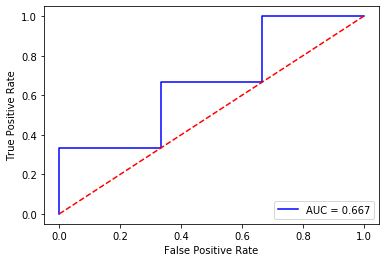

In [334]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_predict_proba[:,1])  #这里y_prob[:,1]这样写是因为y_prob预测的结果其实是两列，第一列是每个样本分类为0的概率，第二列是分类为1的概率
roc_auc  = auc(fpr, tpr)  #auc为Roc曲线下的面积
print("ROC 曲线下面积: %f" % roc_auc)
#开始画ROC曲线
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.show()


## 讨论

本案例的数据集太小，特征变量也不多，还不足以体现机器学习的魔力。仅当作编程实践的体验篇即可，掌握了方法就可以迁移应用到不同的项目上了。